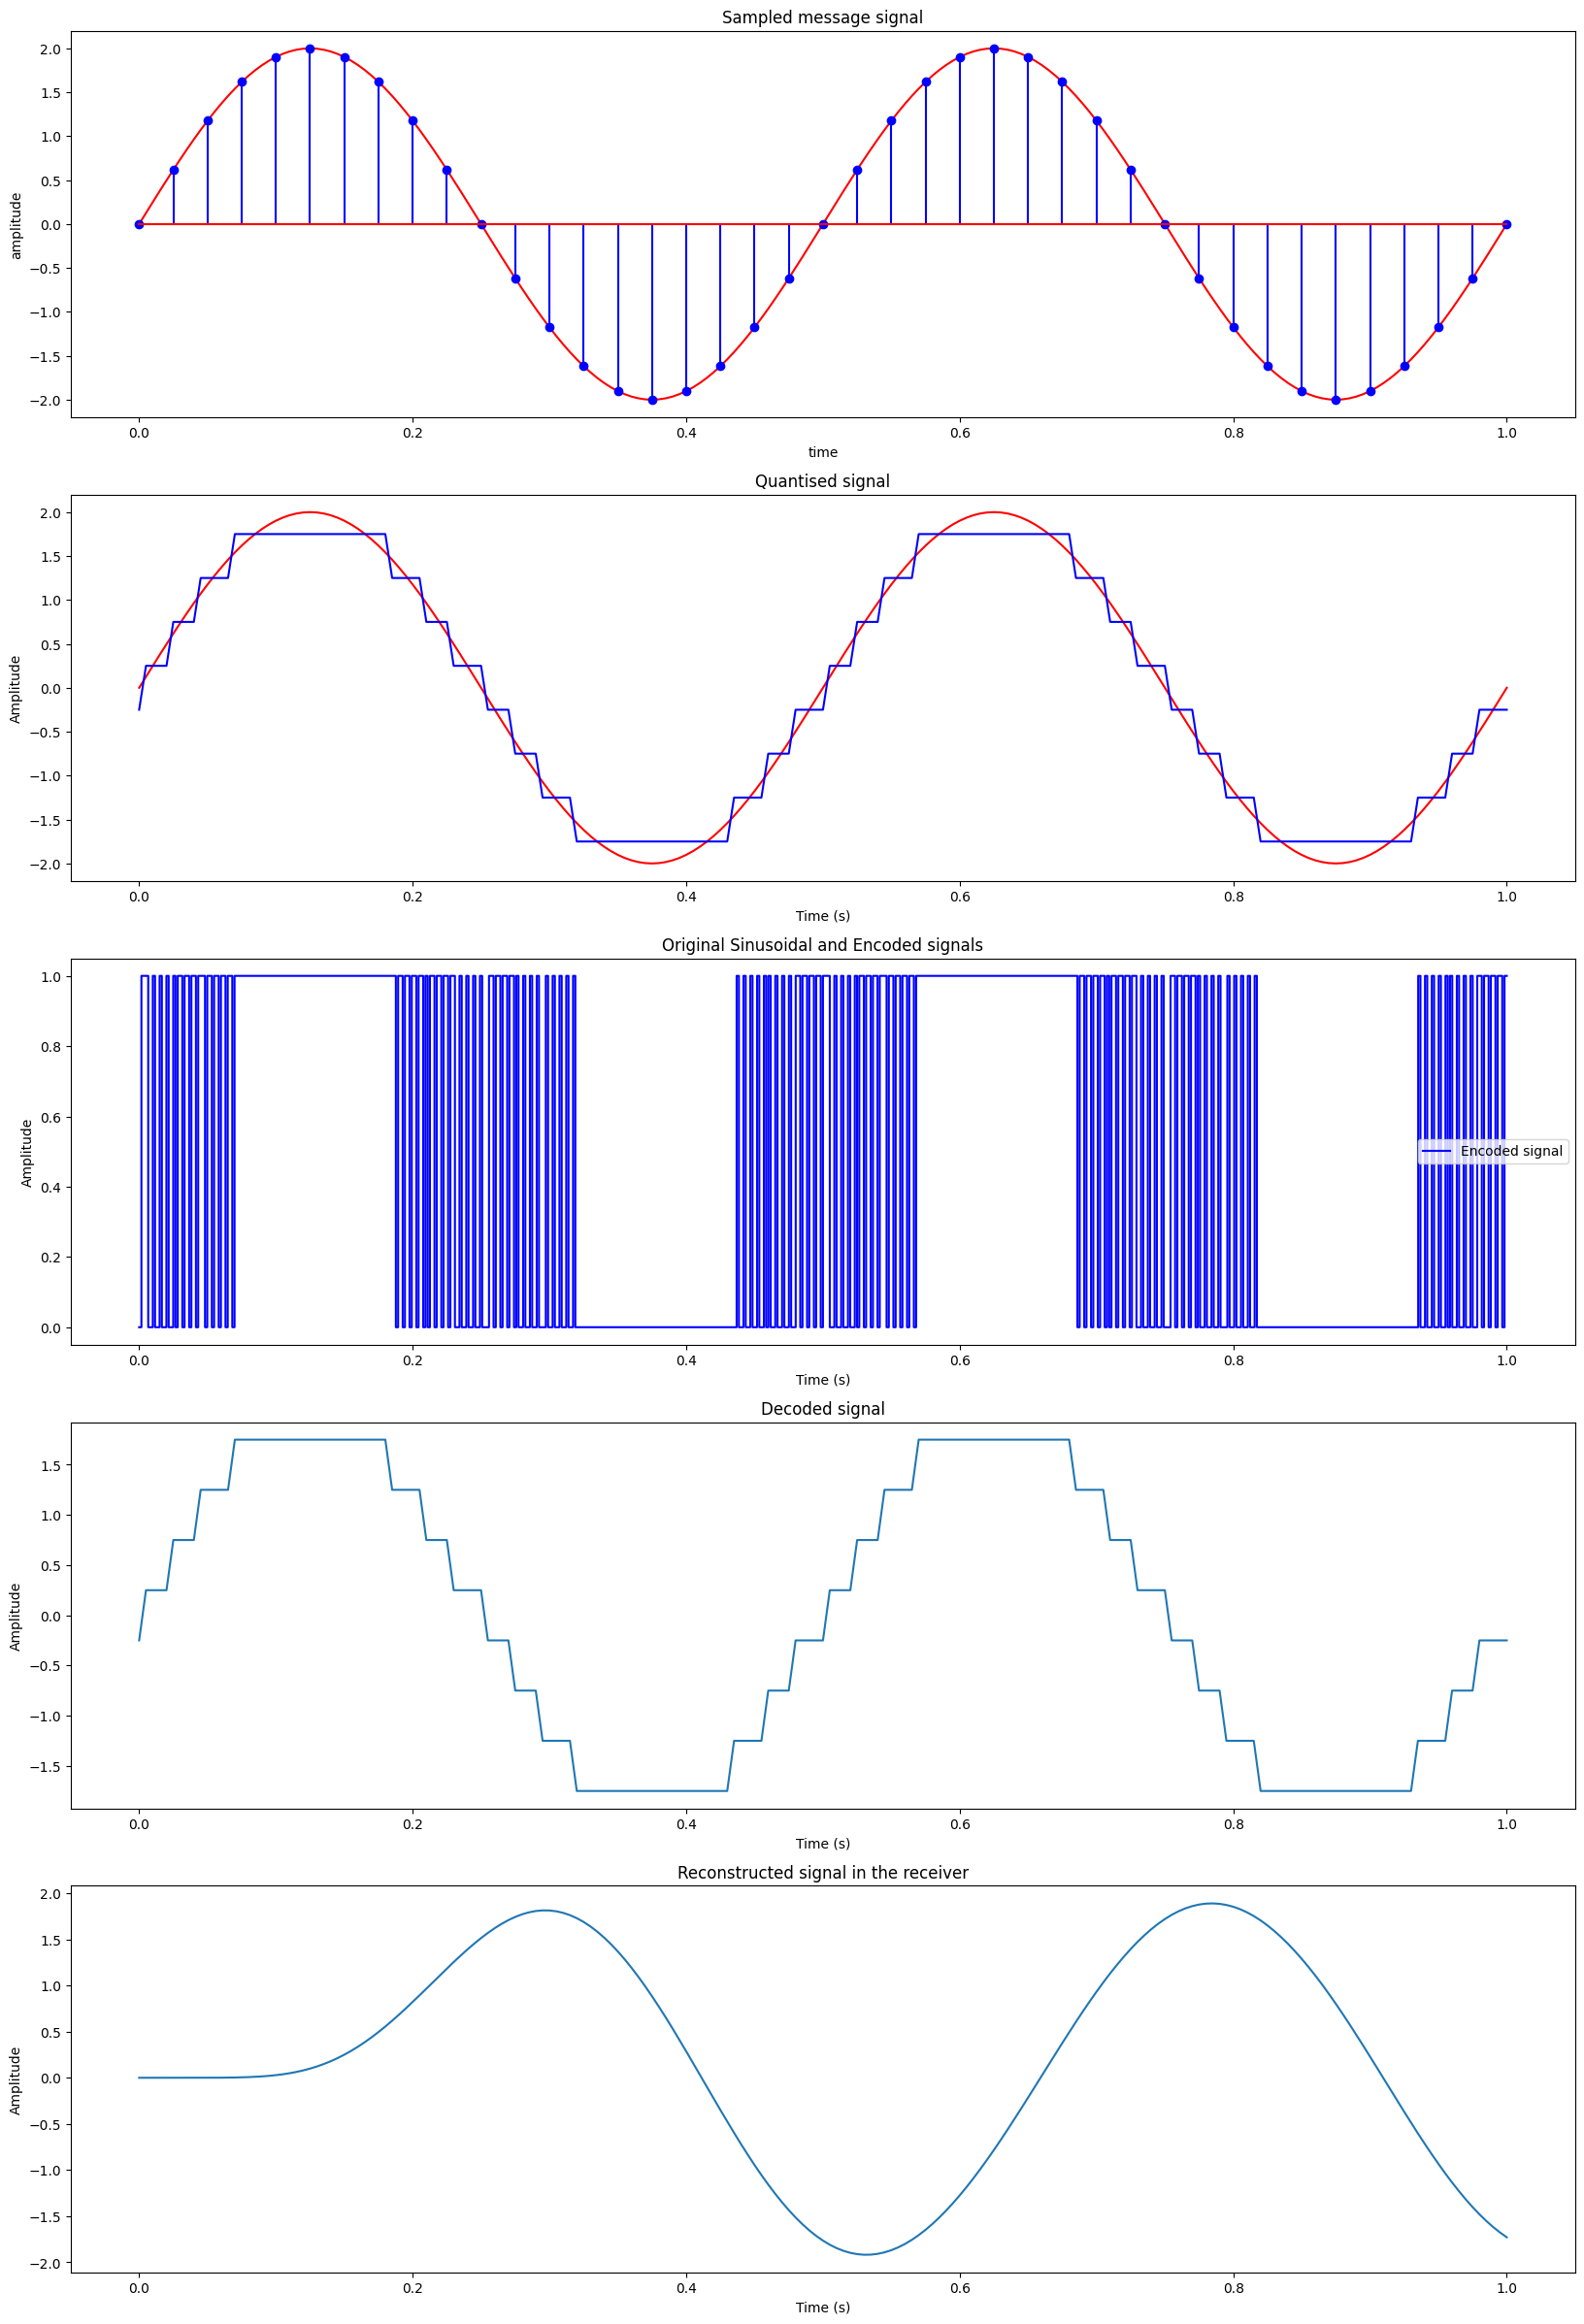

In [4]:
# Uniform  PCM
# 8 level Quantization

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Define parameters
a = 2
fm = 2
fs = 100 * fm

# Generate the original sinusoidal signal
t = np.arange(0, 1 + 1/fs, 1/fs)
x = a * np.sin(2 * np.pi * fm * t)

# Plot the original sinusoidal signal
plt.figure(figsize=(20, 30))
plt.subplot(5, 1, 1)
plt.plot(t, x, 'r')
plt.stem(t[::5], x[::5], linefmt='b', markerfmt='ro', basefmt='r')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Sampled message signal')

# Encoding process
enc = []
xq = np.zeros(len(x))
for i in range(len(x)):
    if 0 < x[i] <= a/4:
        e = [1, 0, 0]
        xq[i] = a/8
    elif a/4 < x[i] <= a/2:
        e = [1, 0, 1]
        xq[i] = a/4 + a/8
    elif a/2 < x[i] <= 3*a/4:
        e = [1, 1, 0]
        xq[i] = a/2 + a/8
    elif 3*a/4 < x[i] <= a:
        e = [1, 1, 1]
        xq[i] = a/2 + a/4+ a/8
    elif -a <= x[i] <= -3*a/4:
        e = [0, 0, 0]
        xq[i] = -(a/2 + a/4+ a/8)
    elif -3*a/4 < x[i] <= -a/2:
        e = [0, 0, 1]
        xq[i] = -(a/2 + a/8)
    elif -a/2 < x[i] <= -a/4:
        e = [0, 1, 0]
        xq[i] = -(a/4 + a/8)
    else:
        e = [0, 1, 1]
        xq[i] = -a/8
    enc.extend(e)

# Plot the quantized signal
plt.subplot(5, 1, 2)
plt.plot(t, x, 'r')
plt.plot(t, xq, 'b')
plt.title('Quantised signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Decoding process
X_Q = []
for i in range(0, len(enc), 3):
    if enc[i:i+3] == [0, 0, 0]:
        x_q = -(a/2 + a/4+ a/8)
    elif enc[i:i+3] == [0, 0, 1]:
        x_q = -(a/2 + a/8)
    elif enc[i:i+3] == [0, 1, 0]:
        x_q = -(a/4 + a/8)
    elif enc[i:i+3] == [0, 1, 1]:
        x_q = -a/8
    elif enc[i:i+3] == [1, 0, 0]:
        x_q = a/8
    elif enc[i:i+3] == [1, 0, 1]:
        x_q =a/4 + a/8
    elif enc[i:i+3] == [1, 1, 0]:
        x_q =  a/2 + a/8
    else:
        x_q = a/2 + a/4+ a/8
    X_Q.append(x_q)

# Define quantization levels and binary codes
quantization_levels = [-(a/2 + a/4+ a/8), -(a/2 + a/8), -(a/4 + a/8), -a/8, a/8, a/4 + a/8, a/2 + a/8, a/2 + a/4+ a/8]
binary_codes = ['000', '001', '010', '011', '100', '101', '110', '111']


quantized_signal = np.zeros_like(x)
for i, sample in enumerate(x):
    quantized_signal[i] = quantization_levels[np.abs(quantization_levels - sample).argmin()]

# Encoding
encoded_signal = ''.join(binary_codes[quantization_levels.index(sample)] for sample in quantized_signal)
# Create time array for encoded signal with appropriate length
t_encoded = np.linspace(0, 1, len(encoded_signal))

# Plot original and encoded signals
plt.subplot(5, 1, 3)
plt.step(t_encoded, [int(bit) for bit in encoded_signal], 'b', where='post', label='Encoded signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Sinusoidal and Encoded signals')
plt.legend()

# Plot the decoded signal
plt.subplot(5, 1, 4)
plt.plot(t, X_Q)
plt.title('Decoded signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstruction
num, den = butter(6, 4 * fm / fs)
recon = lfilter(num, den, X_Q)

# Plot the reconstructed signal
plt.subplot(5, 1, 5)
plt.plot(t, recon)
plt.title('Reconstructed signal in the receiver')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


In [2]:
# Calculate the power of the signal
P_signal = np.mean(np.square(x))

# Calculate the power of the quantization noise
P_quantization_noise = np.mean(np.square(x - xq))

# Calculate the SQNR in dB
SQNR_dB = 10 * np.log10(P_signal / P_quantization_noise)

print("Power of the signal:", P_signal)
print("Power of the quantization noise:", P_quantization_noise)
print("SQNR (Signal-to-Quantization Noise Ratio) in dB:", SQNR_dB)


Power of the signal: 1.9900497512437814
Power of the quantization noise: 0.02513345203990059
SQNR (Signal-to-Quantization Noise Ratio) in dB: 18.986117915576784


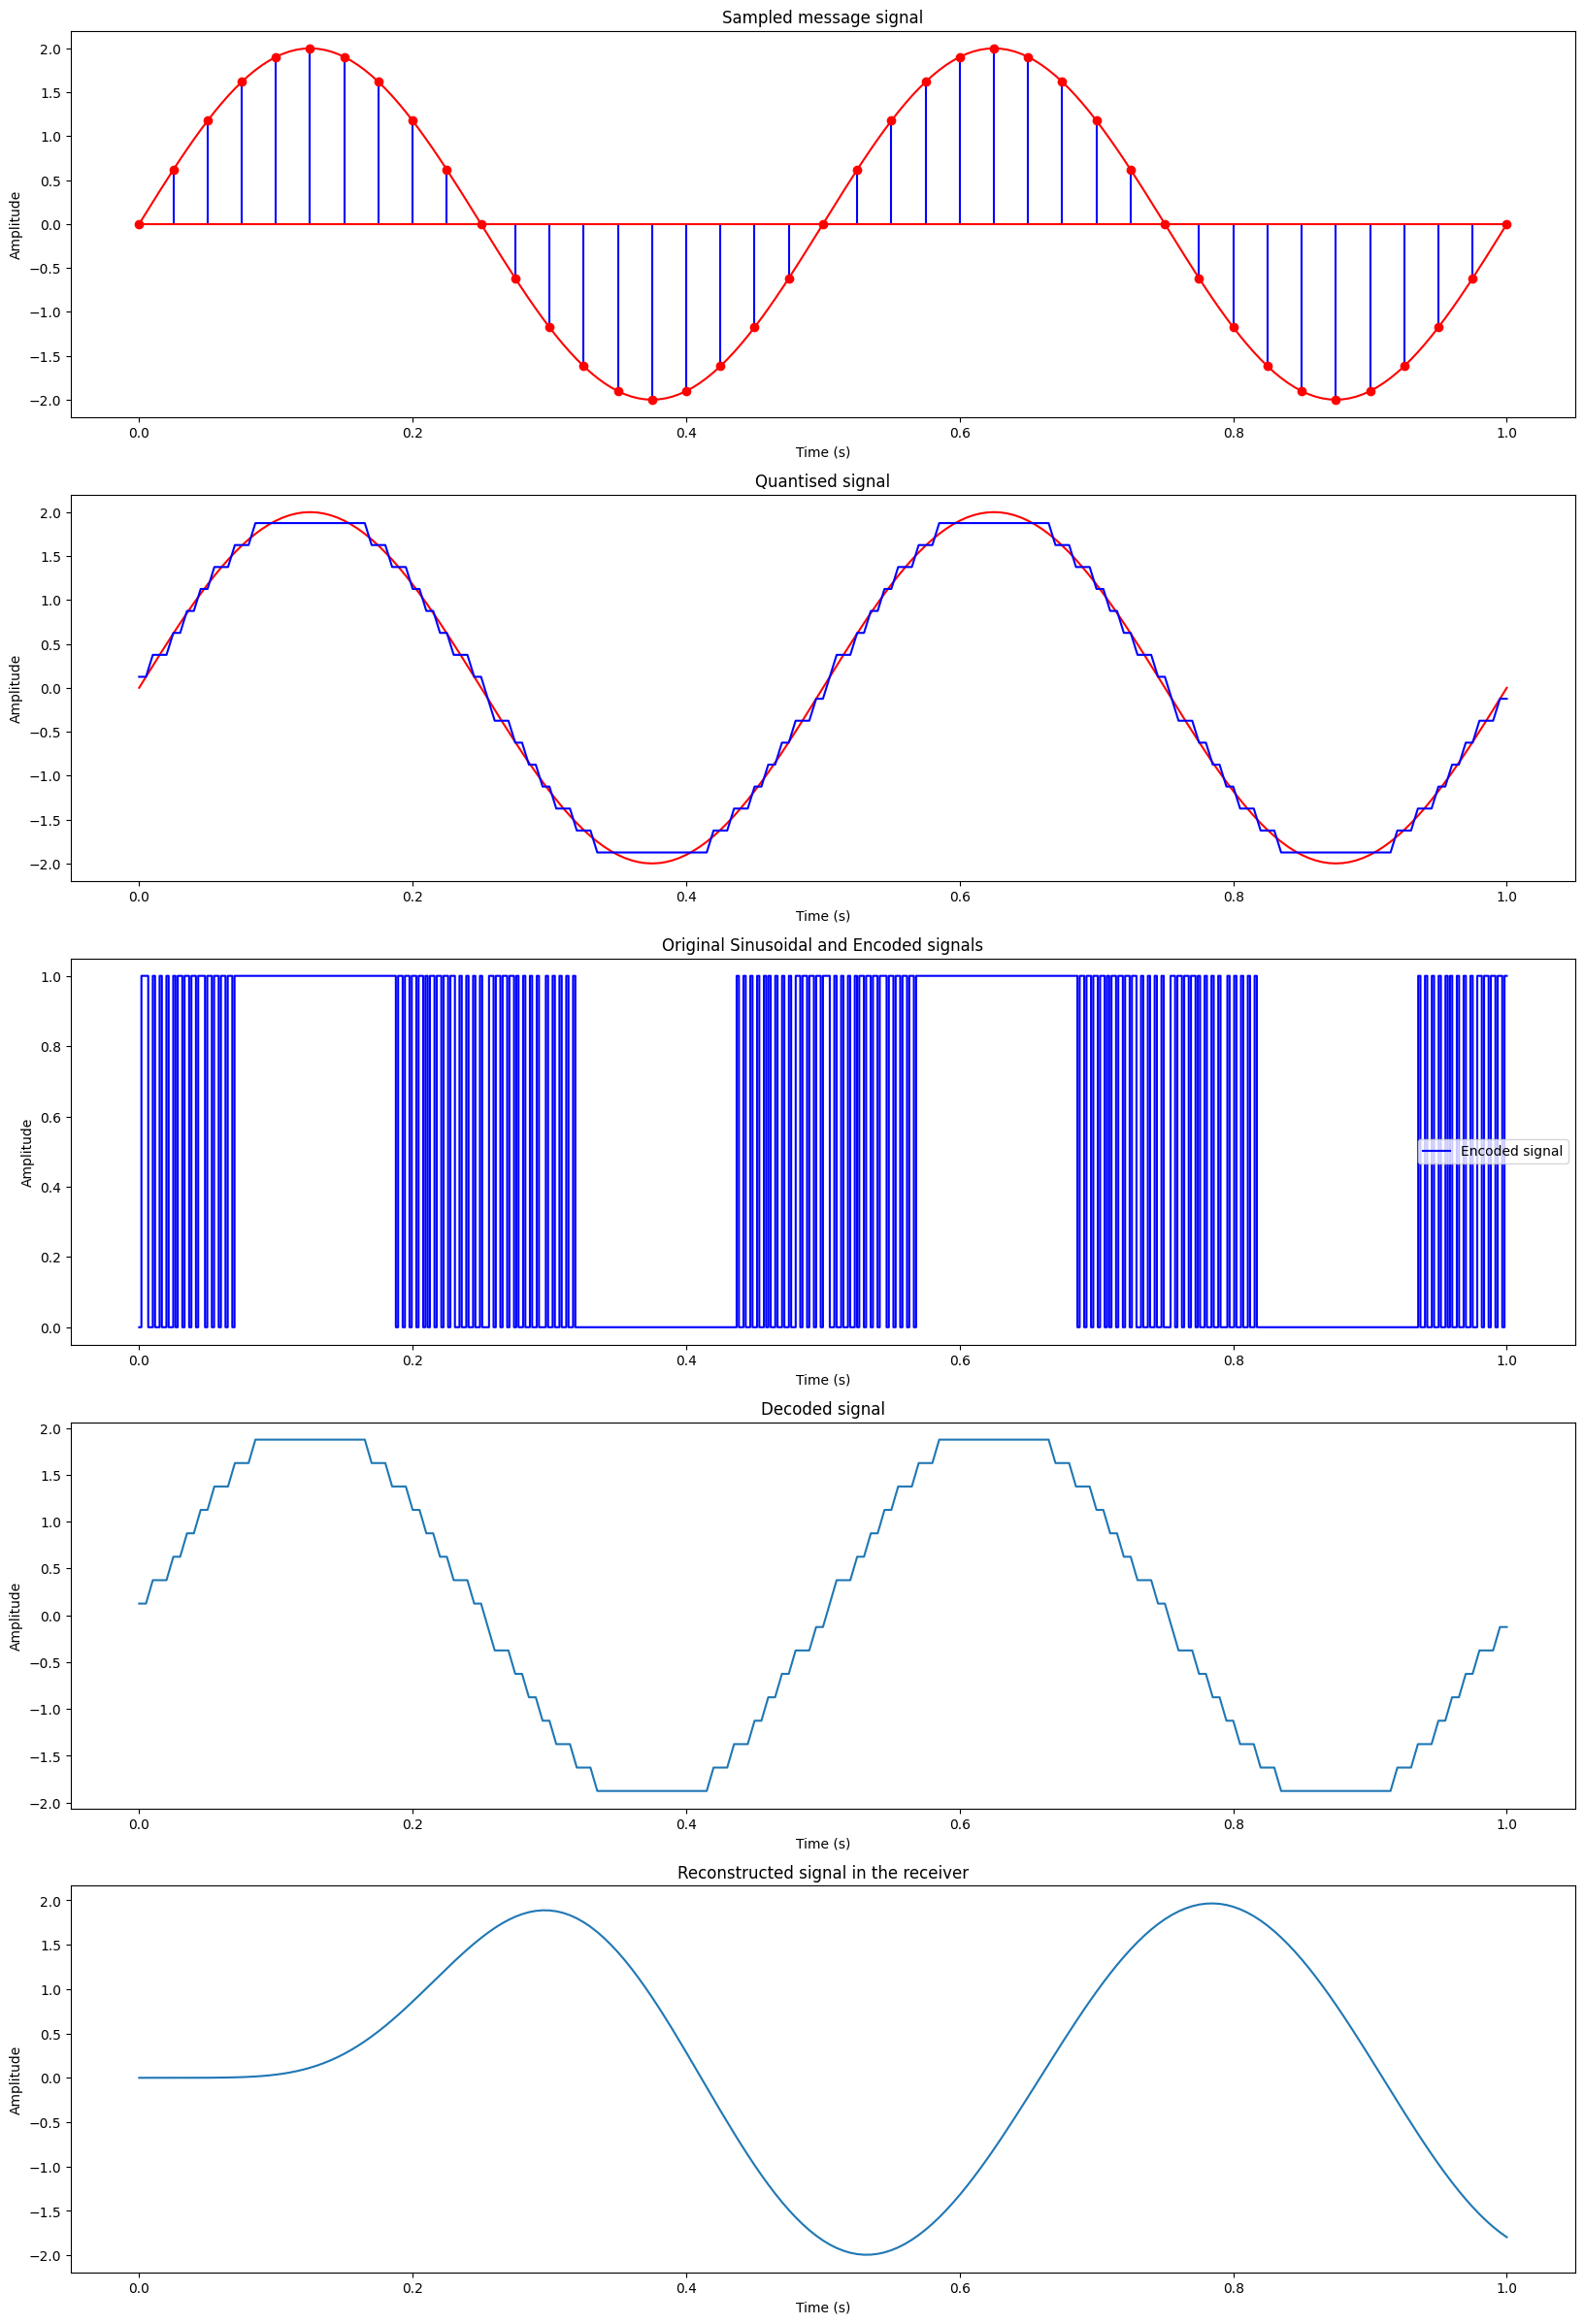

In [2]:
# 16 level Quantization
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Define parameters
a = 2
fm = 2
fs = 100 * fm

# Generate the original signal
t = np.arange(0, 1 + 1/fs, 1/fs)
x = a * np.sin(2 * np.pi * fm * t)

# Plot the original signal
plt.figure(figsize=(20, 30))
plt.subplot(5, 1, 1)
plt.plot(t, x, 'r')
plt.stem(t[::5], x[::5], linefmt='b', markerfmt='ro', basefmt='r')
plt.title('Sampled message signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Quantization
enc = []
xq = np.zeros(len(x))
for i in range(len(x)):
    if a >= x[i] >= 14*a/16:
        e = [1, 1, 1, 1]
        xq[i] = 15*a/16
    elif 14*a/16 > x[i] >= 12*a/16:
        e = [1, 1, 1, 0]
        xq[i] = 13*a/16
    elif 12*a/16 > x[i] >= 10*a/16:
        e = [1, 1, 0, 1]
        xq[i] = 11*a/16
    elif 10*a/16 > x[i] >= 8*a/16:
        e = [1, 1, 0, 0]
        xq[i] = 9*a/16
    elif  8*a/16 > x[i] >= 6*a/16:
        e = [1, 0, 1, 1]
        xq[i] = 7*a/16
    elif 6*a/16 > x[i] >= 4*a/16:
        e = [1, 0, 1, 0]
        xq[i] = 5*a/16
    elif 4*a/16 > x[i] >= 2*a/16:
        e = [1, 0, 0, 1]
        xq[i] = 3*a/16
    elif 2*a/16 > x[i] >= 0:
        e = [1, 0, 0, 0]
        xq[i] = a/16
    elif 0*a/16 > x[i] >= -2*a/16:
        e = [0, 1, 1, 1]
        xq[i] = -a/16
    elif -2*a/16 > x[i] >= -4*a/16:
        e = [0, 1, 1, 0]
        xq[i] = -3*a/16
    elif  -4*a/16 > x[i] >= -6*a/16:
        e = [0, 1, 0, 1]
        xq[i] = -5*a/16
    elif  -6*a/16 > x[i] >= -8*a/16:
        e = [0, 1, 0, 0]
        xq[i] = -7*a/16
    elif  -8*a/16 > x[i] >= -10*a/16:
        e = [0, 0, 1, 1]
        xq[i] = -9*a/16
    elif  -10*a/16> x[i] >= -12*a/16:
        e = [0, 0, 1, 0]
        xq[i] = -11*a/16
    elif  -12*a/16> x[i] >= -14*a/16:
        e = [0, 0, 0, 1]
        xq[i] = -13*a/16
    else:
        e = [0, 0, 0, 0]
        xq[i] = -15*a/16
    enc.extend(e)

# Plot the quantized signal
plt.subplot(5, 1, 2)
plt.plot(t, x, 'r')
plt.plot(t, xq, 'b')
plt.title('Quantised signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Decoding
X_Q = []
for i in range(0, len(enc), 4):
    if enc[i:i+4] == [1, 1, 1, 1]:
        x_q = 15*a/16
    elif enc[i:i+4] == [1, 1, 1, 0]:
        x_q = 13*a/16
    elif enc[i:i+4] == [1, 1, 0, 1]:
        x_q = 11*a/16
    elif enc[i:i+4] == [1, 1, 0, 0]:
        x_q = 9*a/16
    elif enc[i:i+4] == [1, 0, 1, 1]:
        x_q = 7*a/16
    elif enc[i:i+4] == [1, 0, 1, 0]:
        x_q = 5*a/16
    elif enc[i:i+4] == [1, 0, 0, 1]:
        x_q = 3*a/16
    elif enc[i:i+4] == [1, 0, 0, 0]:
        x_q = a/16
    elif enc[i:i+4] == [0, 1, 1, 1]:
        x_q = -a/16
    elif enc[i:i+4] == [0, 1, 1, 0]:
        x_q = -3*a/16
    elif enc[i:i+4] == [0, 1, 0, 1]:
        x_q = -5*a/16
    elif enc[i:i+4] == [0, 1, 0, 0]:
        x_q = -7*a/16
    elif enc[i:i+4] == [0, 0, 1, 1]:
        x_q = -9*a/16
    elif enc[i:i+4] == [0, 0, 1, 0]:
        x_q = -11*a/16
    elif enc[i:i+4] == [0, 0, 0, 1]:
        x_q = -13*a/16
    else:
        x_q = -15*a/16
    X_Q.append(x_q)

quantized_signal = np.zeros_like(x)
for i, sample in enumerate(x):
    quantized_signal[i] = quantization_levels[np.abs(quantization_levels - sample).argmin()]

# Encode the quantized signal
encoded_signal = ''.join(binary_codes[quantization_levels.index(sample)] for sample in quantized_signal)

# Create time array for encoded signal with appropriate length
t_encoded = np.linspace(0, 1, len(encoded_signal))  # Time array for encoded signal

# Plot original and encoded signals
plt.subplot(5, 1, 3)
plt.step(t_encoded, [int(bit) for bit in encoded_signal], 'b', where='post', label='Encoded signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Sinusoidal and Encoded signals')
plt.legend()


# Plot the decoded signal
plt.subplot(5, 1, 4)
plt.plot(t[:len(X_Q)], X_Q)
plt.title('Decoded signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstruction
num, den = butter(6, 4 * fm / fs)
recon = lfilter(num, den, X_Q)

# Plot the reconstructed signal
plt.subplot(5, 1, 5)
plt.plot(t[:len(recon)], recon)
plt.title('Reconstructed signal in the receiver')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


In [4]:
# Calculate signal power
P_signal = np.mean(np.square(x))

# Calculate quantization noise power
P_quantization_noise = np.mean(np.square(x - xq))

# Calculate SQNR in dB
SQNR_dB = 10 * np.log10(P_signal / P_quantization_noise)

print("Signal power:", P_signal)
print("Quantization noise power:", P_quantization_noise)
print("SQNR (dB):", SQNR_dB)


Signal power: 1.9900497512437814
Quantization noise power: 0.006408632659588965
SQNR (dB): 24.92098555206168


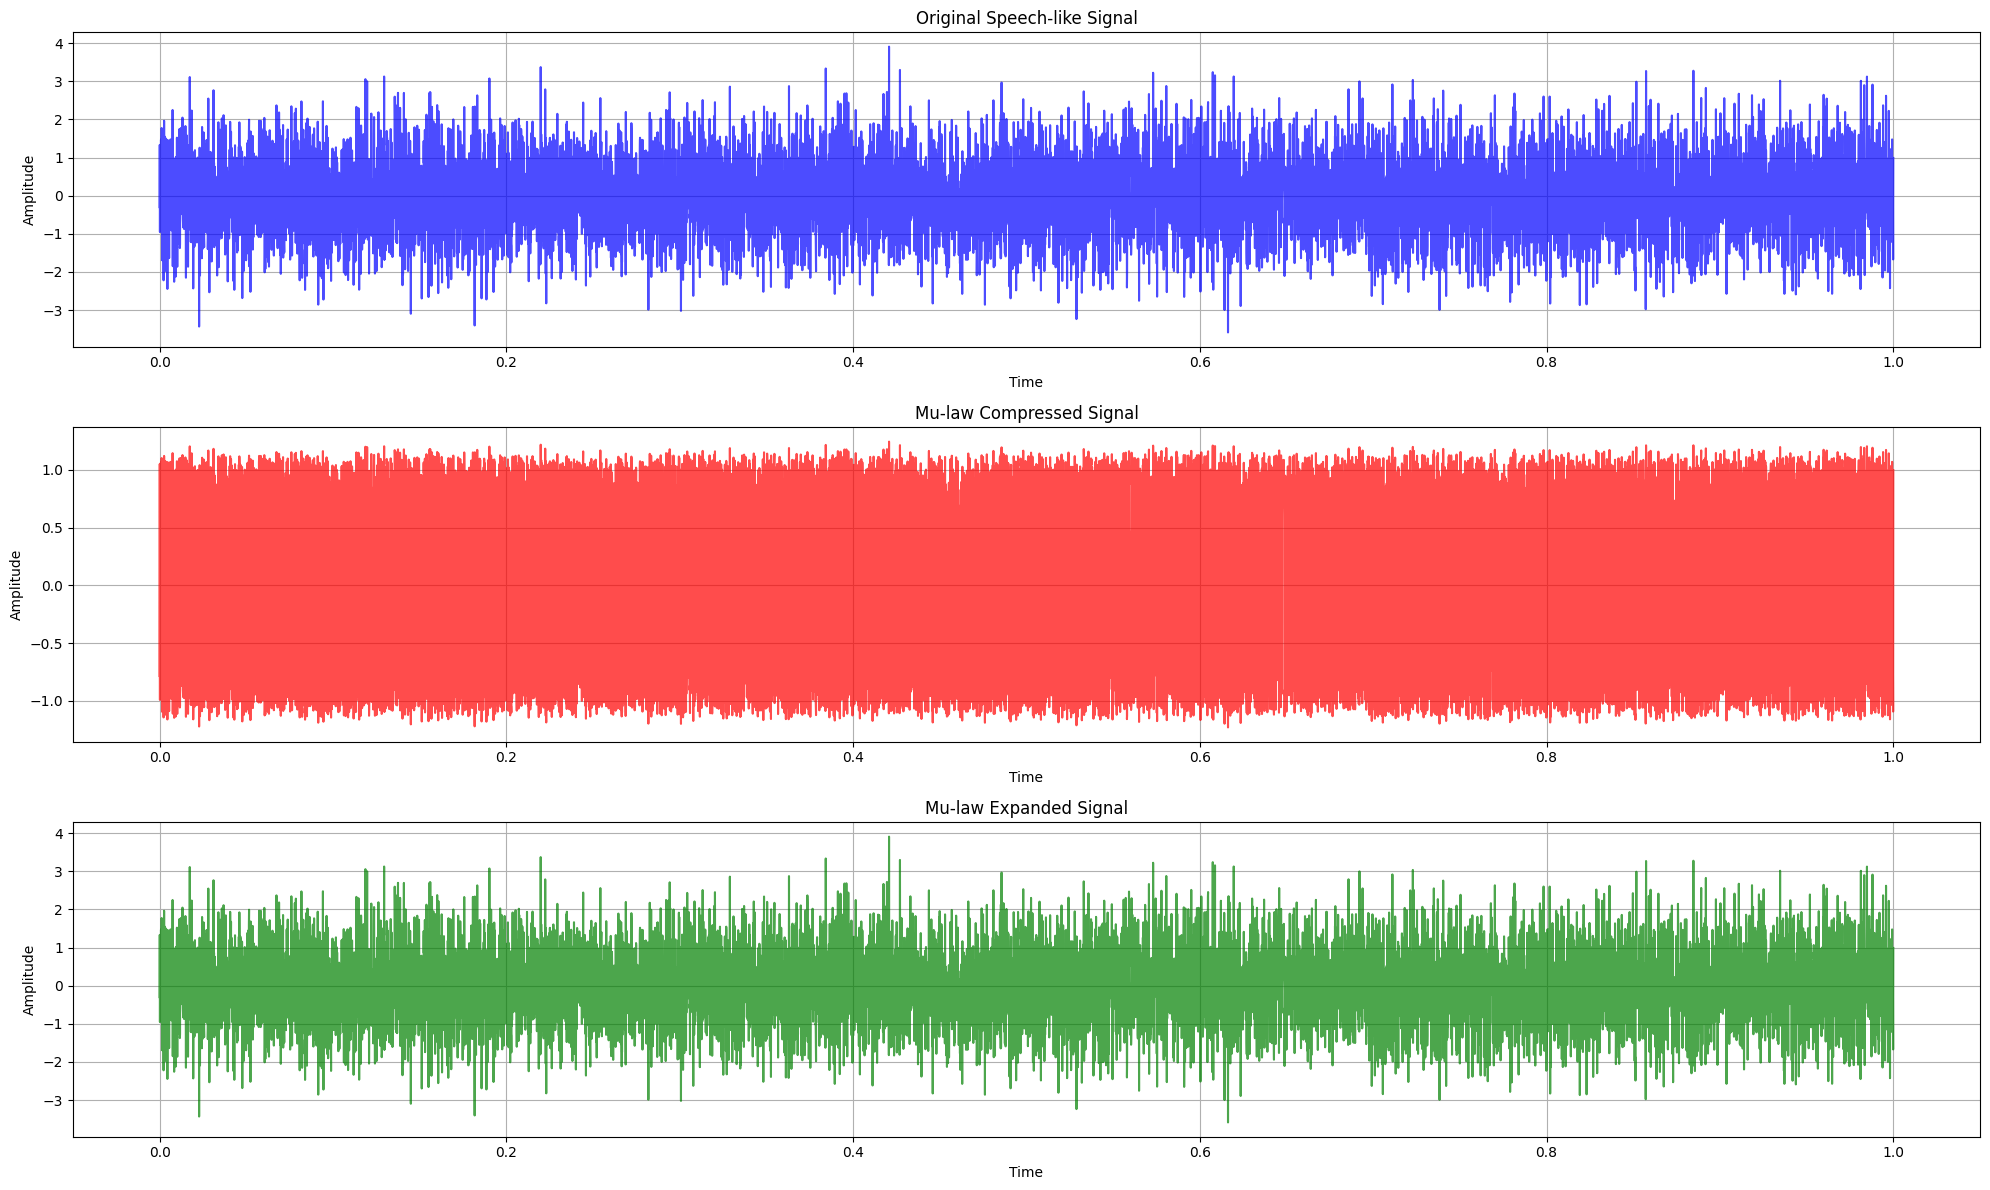

In [5]:
# Non-uniform PCM
import numpy as np
import matplotlib.pyplot as plt

def mu_law_compress(x, mu=255):
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)

def mu_law_expand(y, mu=255):
    return np.sign(y) * (1 / mu) * ((1 + mu) ** np.abs(y) - 1)

# Define parameters
mu = 255
fs = 10000
duration = 1

# Generate speech-like signal with random amplitude
t = np.linspace(0, duration, int(fs * duration))
speech_signal = np.random.normal(0, 1, len(t))

# Apply mu-law compression
compressed_signal = mu_law_compress(speech_signal, mu)

# Apply mu-law expansion
expanded_signal = mu_law_expand(compressed_signal, mu)

plt.figure(figsize=(20, 12))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(t, speech_signal, label='Original Signal', color='blue', alpha=0.7)
plt.title('Original Speech-like Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot Mu-law compressed signal
plt.subplot(3, 1, 2)
plt.plot(t, compressed_signal, label='Mu-law Compressed Signal', color='red', alpha=0.7)
plt.title('Mu-law Compressed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot Mu-law expanded signal
plt.subplot(3, 1, 3)
plt.plot(t, expanded_signal, label='Mu-law Expanded Signal', color='green', alpha=0.7)
plt.title('Mu-law Expanded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
def calculate_sqnr(signal, quantized_signal):
    P_signal = np.mean(np.square(signal))
    P_quantization_noise = np.mean(np.square(signal - quantized_signal))
    P_total_noise = P_quantization_noise
    # Calculate the SQNR in dB
    SQNR_dB = 10 * np.log10(P_signal / P_total_noise)
    return SQNR_dB

# Generate a speech signal
fs = 10000
duration = 1
t = np.linspace(0, duration, int(fs * duration))
speech_signal = np.random.normal(0, 1, len(t))
uniform_quantized_signal = np.round(speech_signal)

# Apply nonuniform PCM (e.g., mu-law companding)
mu = 255  # Mu-law parameter
mu_law_compressed_signal = mu_law_compress(speech_signal, mu)
mu_law_expanded_signal = mu_law_expand(mu_law_compressed_signal, mu)

# Calculate SQNR for both uniform and nonuniform PCM
sqnr_uniform_pcm = calculate_sqnr(speech_signal, uniform_quantized_signal)
sqnr_nonuniform_pcm = calculate_sqnr(speech_signal, mu_law_expanded_signal)

print("SQNR for Uniform PCM:", sqnr_uniform_pcm, "dB")
print("SQNR for Nonuniform PCM (Mu-law):", sqnr_nonuniform_pcm, "dB")

SQNR for Uniform PCM: 10.81313682468943 dB
SQNR for Nonuniform PCM (Mu-law): 306.7334247798166 dB
